#789 Final Project

##Build Desfeng Dataset

In [1]:
import random
import cv2
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
!pip install h5py

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
np.random.seed(1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Build Desfeng traindataset

In [3]:
train_file_dir = '/content/drive/MyDrive/Data/Assignment/789Final/Desfeng2.0/traindataset/train/'
trainf = open('/content/drive/MyDrive/Data/Assignment/789Final/Desfeng2.0/traindataset/train.txt', 'r')

In [4]:
train_list = []
for i in range(0, 2400):
  train_list.append(i)
  random.shuffle(train_list)

In [5]:
train_num = []  
train_imgs = []  
line = trainf.readline()
while line:
   a = line.split()  
   c = a[0]+' '+a[1]
   data = c  
   train_imgs.append(data)  
   label = a[2] 
   train_num.append(label)
   line = trainf.readline()
trainf.close()

In [6]:
train_image_list = []  
train_label_list = []  
for j in range(len(train_list)):  
    num_1 = train_list[j]
    train_file_path = train_file_dir + train_imgs[num_1]  
    img = cv2.imread(train_file_path)  
    img = cv2.resize(img, (227, 227), interpolation=cv2.INTER_CUBIC)  
    train_image_list.append(img)  
    train_label_list.append(train_num[num_1])  

In [7]:
image_train = np.array(train_image_list)
label_train = [int(x)for x in train_label_list]
label_train = np.array(label_train)

###Build Desfeng testdataset

In [8]:
test_file_dir = '/content/drive/MyDrive/Data/Assignment/789Final/Desfeng2.0/testdataset/test/'  
testf = open('/content/drive/MyDrive/Data/Assignment/789Final/Desfeng2.0/testdataset/test.txt', 'r')

In [9]:
test_list = []
for i in range(0, 600):
  test_list.append(i)
  random.shuffle(test_list)

In [10]:
test_num = []  
test_imgs = []  
line = testf.readline()
while line:
   a = line.split()  
   c = a[0]+' '+a[1]
   data = c  
   test_imgs.append(data)  
   label = a[2]  
   test_num.append(label)
   line = testf.readline()
testf.close()

In [11]:
test_image_list = []  
test_label_list = []  
for j in range(len(test_list)):  
    num_1 = test_list[j]
    test_file_path = test_file_dir + test_imgs[num_1]  
    test_img = cv2.imread(test_file_path)  
    test_img = cv2.resize(test_img, (227, 227), interpolation=cv2.INTER_CUBIC)  
    test_image_list.append(test_img)  
    test_label_list.append(test_num[num_1])  

In [12]:
image_test = np.array(test_image_list)
label_test = [int(x)for x in test_label_list]
label_test = np.array(label_test)

##Preprocessing&Varification

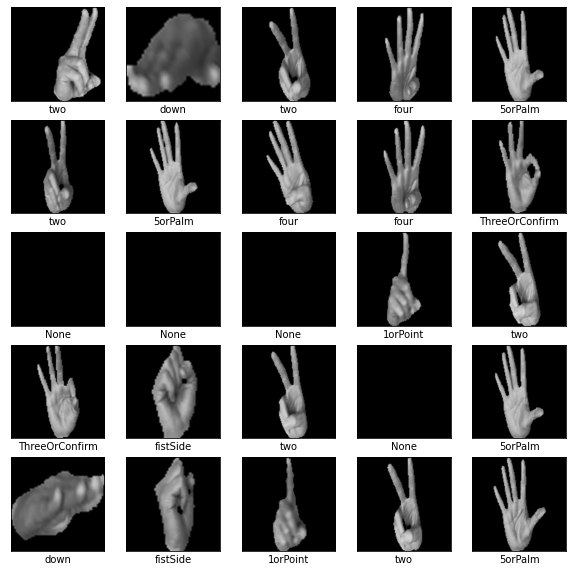

In [13]:
class_names = ['1orPoint', 'two', 'four', '5orPalm', 'None', 'down', 'fist', 'fistSide', 'ThreeOrConfirm','Point']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label_train[i]])
plt.show()

##Build the model

### Create the convolutional base

In [14]:
# (3) Create a sequential model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu', input_shape=(227,227,3)))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(1024, activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# 2nd Dense Layer
model.add(Dense(1024, activation='relu'))
# Add Dropout
model.add(Dropout(0.5))
# 3rd Dense Layer
model.add(Dense(1024, activation='relu'))
# Add Dropout
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

###Model summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 32)        11648     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       991488    
_________________________________________________________________
activation (Activation)      (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1

###Compile the model

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##Train the model

###Feed the model

In [17]:
image_train.shape

(2400, 227, 227, 3)

In [31]:
filepath='/content/drive/MyDrive/Data/Model/best_model5.h5'
callbacks_list = [ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')]

In [32]:
datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125, rotation_range=60, fill_mode='constant',cval=0.)
datagen.fit(image_train)

# history=model.fit(image_train, label_train, batch_size=32, epochs=30, validation_data=(image_test, label_test), callbacks=callbacks_list, verbose=1, shuffle=True)
model.fit_generator(datagen.flow(image_train,label_train,batch_size=32), epochs=30, validation_data=(image_test, label_test), callbacks=callbacks_list, verbose=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
75/75 [==============================] - 24s 325ms/step - loss: 0.2034 - accuracy: 0.9321 - val_loss: 0.0491 - val_accuracy: 0.9800

Epoch 00001: val_accuracy improved from -inf to 0.98000, saving model to /content/drive/MyDrive/Data/Model/best_model5.h5
Epoch 2/30
75/75 [==============================] - 25s 333ms/step - loss: 0.3406 - accuracy: 0.9183 - val_loss: 0.5025 - val_accuracy: 0.8567

Epoch 00002: val_accuracy did not improve from 0.98000
Epoch 3/30
75/75 [==============================] - 24s 326ms/step - loss: 0.5045 - accuracy: 0.8633 - val_loss: 0.5541 - val_accuracy: 0.8400

Epoch 00003: val_accuracy did not improve from 0.98000
Epoch 4/30
75/75 [==============================] - 24s 325ms/step - loss: 0.4095 - accuracy: 0.8858 - val_loss: 0.1379 - val_accuracy: 0.9717

Epoch 00004: val_accuracy did not improve from 0.98000
Epoch 5/30
75/75 [==============================] - 24s 325ms/step - loss: 0.3100 - accuracy: 0.9013 - val_loss: 0.0567 - val_accuracy: 0

###Evaluate accuracy

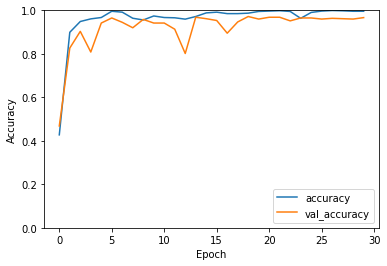

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [22]:
test_loss, test_acc = model.evaluate(image_test, label_test, verbose=2)
print(test_acc)

19/19 - 0s - loss: 0.0105 - accuracy: 1.0000
1.0


###Make predictions

In [23]:
import tensorflow as tf

In [24]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(image_test)

In [25]:
predictions[0]

array([0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675,
       0.23196931, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
      dtype=float32)

In [26]:
np.argmax(predictions[0])

5

In [27]:
label_test[0]

5

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###Verify predictions

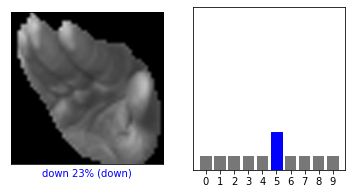

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], label_test, image_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  label_test)
plt.show()

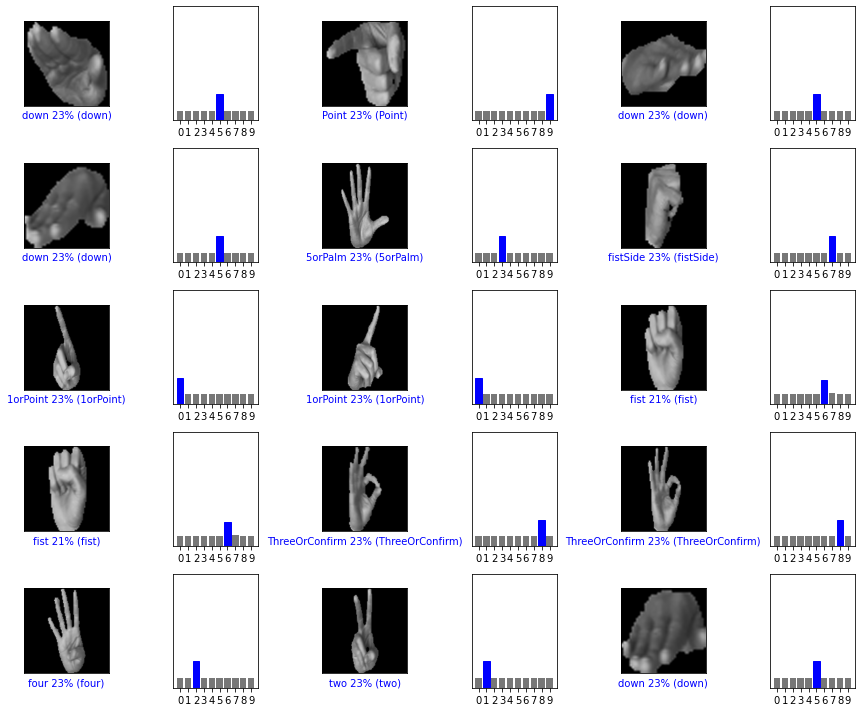

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], label_test, image_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], label_test)
plt.tight_layout()
plt.show()